In [13]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np

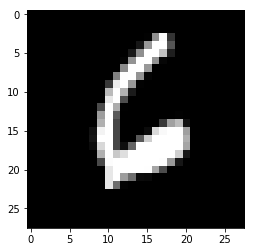

In [16]:
plt.imshow(mnist.train.images[3].reshape(28, 28), cmap='gray')

In [35]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
B = tf.Variable(tf.zeros([10]))

y = tf.nn.tanh(tf.matmul(x, W) + B)

mse = tf.reduce_mean(tf.square(y - y_))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(mse)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [36]:
train_loss = []
test_loss = []
for i in range(150):
    batchX, batchY = mnist.train.next_batch(1000)
    sess.run(train_step, feed_dict={x: batchX, y_: batchY})
    
    loss1 = sess.run(mse, feed_dict={x: batchX, y_: batchY})
    loss2 = sess.run(mse, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    train_loss.append(loss1)
    test_loss.append(loss2)
print("Training finished")

Training finished


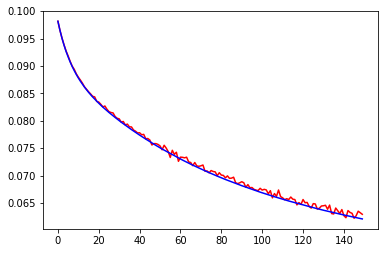

In [38]:
plt.plot(train_loss, 'r')
plt.plot(test_loss, 'b')

In [40]:
pred = sess.run(y, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

In [42]:
print(pred)

[[ 0.04232315 -0.02541186  0.02534906 ...  0.36392617  0.02511046
   0.14583218]
 [ 0.13009092  0.11430796  0.22638875 ... -0.09736522  0.09363221
  -0.0741908 ]
 [-0.02924147  0.30511883  0.06482138 ...  0.03039569  0.05970661
   0.00994304]
 ...
 [-0.07510703  0.08716911  0.03654173 ...  0.20211191  0.17995198
   0.23509705]
 [ 0.08962426  0.172945    0.05246815 ...  0.09747311  0.1482127
   0.04496162]
 [ 0.30786285  0.02711261  0.22406031 ... -0.04610436  0.01424965
   0.04300938]]


In [46]:
errors = 0.
for i in range(pred.shape[0]):
    if np.argmax(pred[i]) != np.argmax(mnist.test.labels[i]):
        errors = errors + 1
print("Test error :" + str(errors/pred.shape[0]))

Test error :0.204
